In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

from data_functions import plot_data 

/home/varsallz/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Economic Policy Uncertainty Index # from Economic Policy Uncertainty

In [2]:
df = pd.read_csv("../cfpr_datasets/Canada_Policy_Uncertainty_Data.csv")
df = df.dropna()
df = df.drop(df.index[0:15])
df = df.drop(df.index[-1])

df["Month"] = df['Month'].astype(int)
df["Date"] = df["Year"].astype(str) + '-' + df["Month"].astype(str) + '-01'
df.drop(['Year', 'Month'], axis='columns', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

plot_data(df, "Economic Policy Uncertainty Index")


file_name = 'Economic_Policy_Uncertainty_Index.csv'
df.to_csv(file_name, index=True)


FileNotFoundError: [Errno 2] No such file or directory: '../cfpr_datasets/Canada_Policy_Uncertainty_Data.csv'

Geopolitical Risk from  Caldara and Iacoviello GPR index 

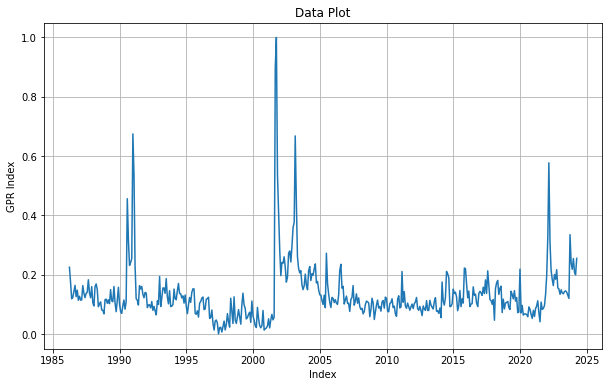

In [ ]:
df1 = pd.DataFrame(pd.read_csv("../cfpr_datasets/data_gpr_daily_recent.csv"))
df1 = df1.drop(["event", 'var_name', 'var_label'], axis=1)
df1 = df1.dropna()
df1[df1.columns[2]]=pd.to_numeric(df1[df1.columns[2]].str.replace(',', ''))
df1[df1.columns[3]]=pd.to_numeric(df1[df1.columns[3]].str.replace(',', ''))
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index(df1['date'])

df1.drop(['date', 'DAY'], axis='columns', inplace=True)
df1= df1.resample('MS').sum()



scaler = MinMaxScaler(feature_range=(0, 1))
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)

file_name = 'GPR_Index.csv'
df1.to_csv(file_name, index=True)
plot_data(df1['GPRD'], "GPR Index")


